In [1]:
# PROJECT - AI-Based Real Estate Valuation System

In [2]:
# Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload & Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Dataset.csv")

# Shape of dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)

# First 10 rows
print(df.head(10))

# Data types
print(df.dtypes)

# Summary statistics (numerical columns)
print(df.describe())

Saving Dataset.csv to Dataset.csv
Shape: (250000, 23)
Columns: Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')
   ID         State        City      Locality      Property_Type  BHK  \
0   1    Tamil Nadu     Chennai   Locality_84          Apartment    1   
1   2   Maharashtra        Pune  Locality_490  Independent House    3   
2   3        Punjab    Ludhiana  Locality_167          Apartment    2   
3   4     Rajasthan     Jodhpur  Locality_393  Independent House    2   
4   5     Rajasthan      Jaipur  Locality_466              Villa    4   
5   6   West Bengal    Durgapur  Locality_246          Apartment    4   
6   7   

In [5]:
# Drop unncessary columns
if "ID" in df.columns:
    df = df.drop(columns=["ID"])
if "Price_per_SqFt" in df.columns:
    df = df.drop(columns=["Price_per_SqFt"])

In [6]:
# Check Missing Values
print("Missing values per column:\n", df.isnull().sum())

# If missing values exist, fill them with 0
df.fillna(0, inplace=True)

# Check Duplicate Rows
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

Missing values per column:
 State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64
Duplicate Rows: 0


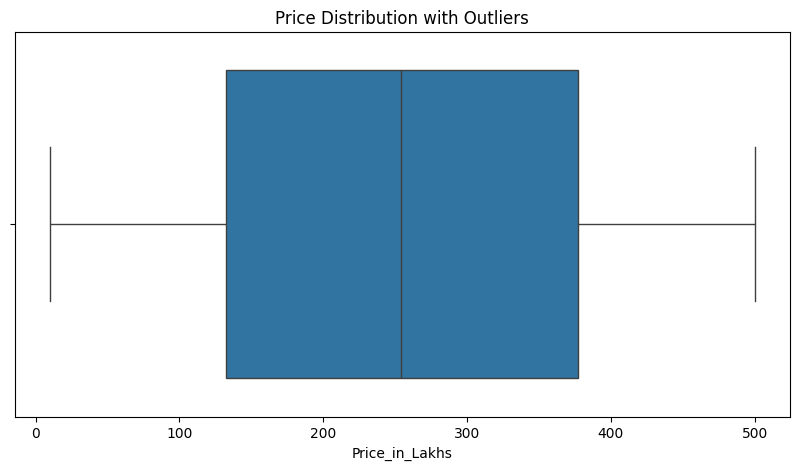

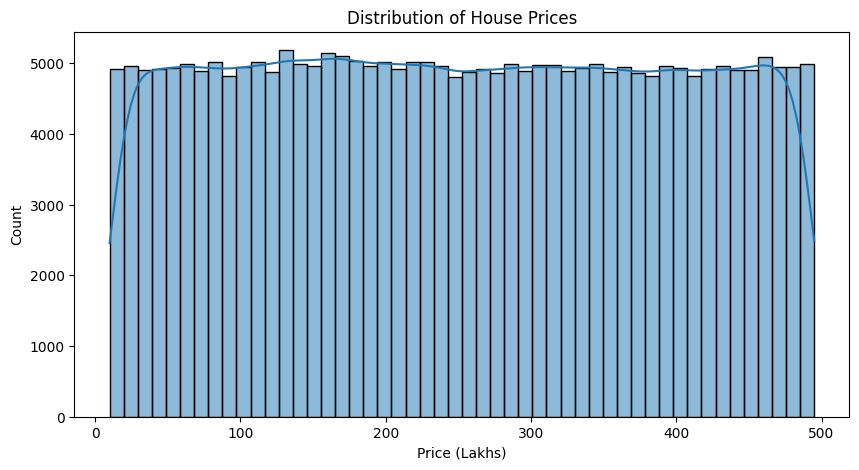

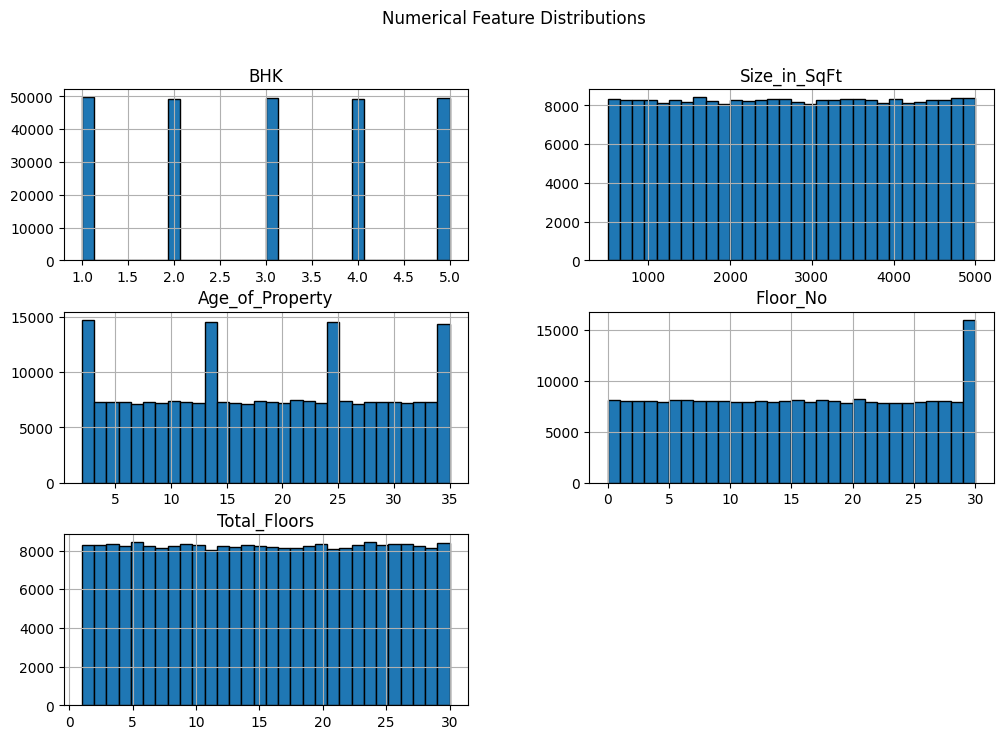

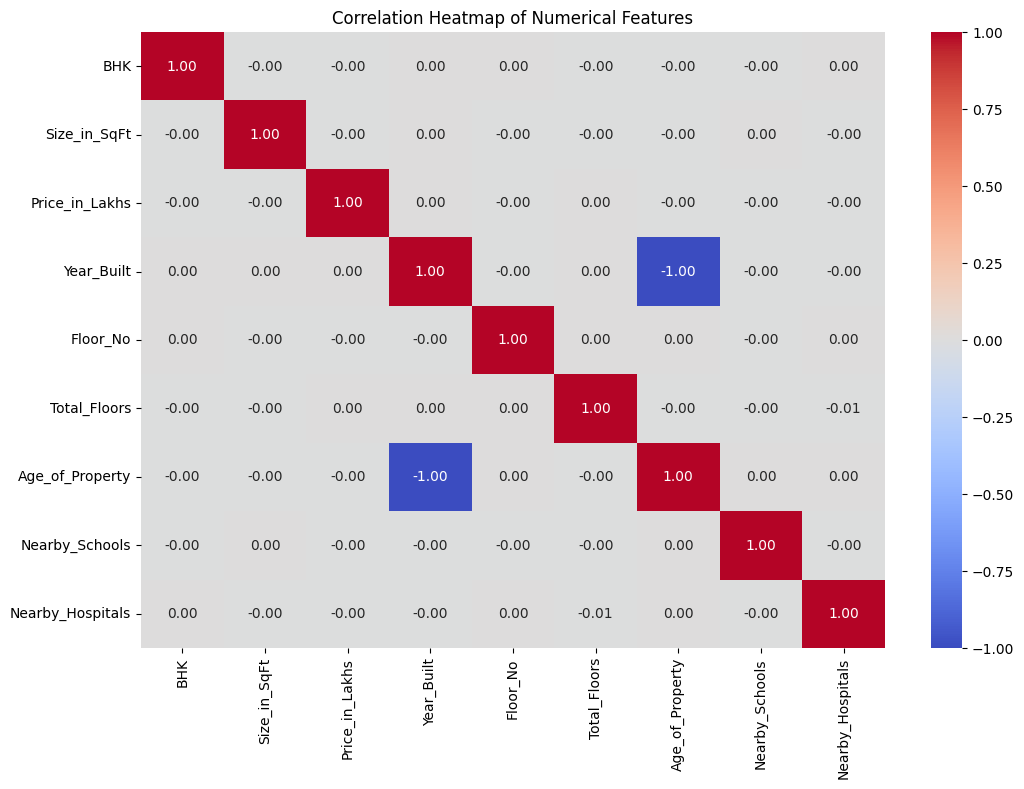

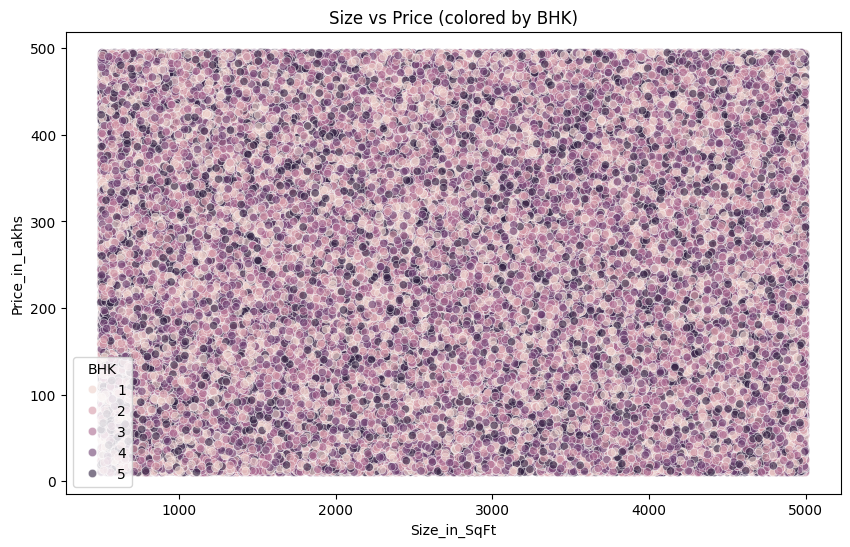

In [7]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Handle Outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Price_in_Lakhs"])
plt.title("Price Distribution with Outliers")
plt.show()

# Keep only rows where price is below 99th percentile
upper_limit = df["Price_in_Lakhs"].quantile(0.99)
df = df[df["Price_in_Lakhs"] <= upper_limit]

# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Price_in_Lakhs"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (Lakhs)")
plt.show()

# Numerical Feature Distributions
num_cols = ["BHK", "Size_in_SqFt", "Age_of_Property", "Floor_No", "Total_Floors"]
df[num_cols].hist(figsize=(12,8), bins=30, edgecolor="black")
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Size vs Price Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Size_in_SqFt", y="Price_in_Lakhs", hue="BHK", data=df, alpha=0.6)
plt.title("Size vs Price (colored by BHK)")
plt.show()

In [8]:
# Download the file
df.to_excel('Cleanded Dataset.xlsx', index=False, engine='openpyxl')
print("\nFile saved as 'Cleaned Dataset.xlsx'")


File saved as 'Cleaned Dataset.xlsx'
